#**Project:Brain Tumor Classification**

#**Problem Description**

**Tumors can be categorized into cancerous (malignant) and non-cancerous (benign) types, with primary tumors originating within the brain and secondary tumors spreading from other parts of the body. The symptoms vary based on the affected brain region and may include persistent headaches, seizures, vision problems, vomiting, and changes in mental function. Notably, morning headaches that alleviate with vomiting are characteristic. As the disease progresses, individuals may experience difficulties in walking, speaking, or sensation, leading to potential unconsciousness.**

##**More Information About Brain Tumor:**

**A brain tumor refers to the abnormal growth of cancerous or non-cancerous cells within the brain. Tumors can either originate in the brain or result from cancer spreading from other body parts. Symptoms encompass new or intensified headaches, blurred vision, loss of balance, confusion, and seizures. Some cases may present with no noticeable symptoms. Treatment options involve surgery, radiation, and chemotherapy.**

##**Prevalence:**

**Brain tumors are relatively rare compared to other types of cancers, accounting for about 1-2% of all cancer diagnoses.**

**The prevalence can vary by age, with certain types of brain tumors more common in children and others more prevalent in adults.**

##**Global Incidence:**

**The incidence of brain tumors varies globally, with differences in rates among countries and populations.**

**It is estimated that there are around 8 to 10 cases of primary brain tumors per 100,000 people annually.**

##**Common Causes:**

**The exact causes of most brain tumors are still not well understood.
Some risk factors and associations have been identified, but in many cases, the cause remains unknown.**

**Known risk factors may include exposure to ionizing radiation, certain genetic conditions, family history, and certain environmental factors.**


##**Symptoms:**

**Headache: Acute or persistent**

**Muscular: Difficulty walking, instability, muscle weakness, coordination problems, weakness on one side of the body, or weakness in the arms and legs**

**Whole body: Dizziness, fatigue, or vertigo**

**Gastrointestinal: Nausea or vomiting**

**Sensory: Pins and needles or reduced sensation of touch**

**Cognitive: Inability to speak or understand language, mental confusion**

**Other common symptoms: Blurred vision, difficulty speaking, personality changes, seizures, or sleepiness**

##**Diagnosis and Treatment:**

**Diagnosis often involves imaging studies such as MRI or CT scans, and sometimes a biopsy may be needed for further characterization.**

**Treatment options include surgery to remove the tumor, radiation therapy, and chemotherapy.**

**The choice of treatment depends on factors such as the type and grade of the tumor, its location, and the overall health of the patient.**


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation, GlobalAveragePooling2D,BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.applications import imagenet_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [2]:
pip install matplotlib

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
train_dir='/content/drive/MyDrive/project/models/All model and dataset/brian/Brain Tumor/Training'
test_dir='/content/drive/MyDrive/project/models/All model and dataset/brian/Brain Tumor/Testing'

In [5]:
# Define the categories
categories = ["glioma", "meningioma", "notumor", "pituitary"]

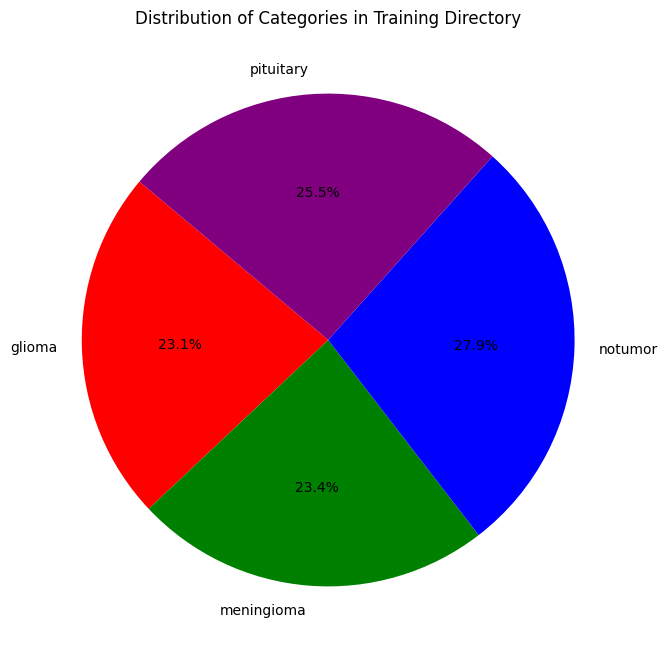

In [6]:
# Initialize an empty dictionary to store counts
category_counts = {category: 0 for category in categories}

# Loop through each category and count the number of files
for category in categories:
    category_path = os.path.join(train_dir, category)
    category_counts[category] = len(os.listdir(category_path))

# Convert dictionary values to a list
data = list(category_counts.values())

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=categories, autopct='%1.1f%%', startangle=140, colors=['red', 'green', 'blue', 'purple'])
plt.title('Distribution of Categories in Training Directory')
plt.show()

##**Glioma:**

**Gliomas are a type of tumor that arises from glial cells in the brain or spinal cord.**

**Glial cells provide support and protection for neurons (nerve cells).**

**Gliomas can be benign or malignant and are categorized based on the type of glial cell they originate from.**

##**Meningioma:**

**Meningiomas are tumors that arise from the meninges, which are layers of tissue covering the brain and spinal cord.**

**The meninges protect the central nervous system.**

**Meningiomas are often slow-growing and can be either benign or, in rarer cases, malignant.**

##**Notumor:**

**"No tumor" or "notumor" likely refers to images that do not contain brain tumors.**

**In medical datasets, having a class like "notumor" helps create a balanced dataset, providing examples of the absence of the condition of interest.**

##**Pituitary:**

**The pituitary gland is a small, pea-sized gland located at the base of the brain.**

**It plays a crucial role in regulating various bodily functions by producing and releasing hormones.**

**Pituitary tumors can affect hormone production and cause various health issues.**

##**Data Argumentation for Training and Testing**

In [7]:
# Define image size and batch size
image_size = (150, 150)
batch_size = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


##**Model Architecture**

In [8]:
# Updated model architecture
model = Sequential([
    Conv2D(16, (3, 3), activation="relu", input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(len(categories), activation="softmax")
])

In [9]:
# Compile and train the updated model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
# Train the model
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=30, validation_data=test_generator, validation_steps=test_generator.samples // batch_size)

Epoch 1/30
178/178 [==============================] - 2312s 13s/step - loss: 1.0177 - accuracy: 0.5467 - val_loss: 1.2526 - val_accuracy: 0.5094
Epoch 2/30
178/178 [==============================] - 177s 992ms/step - loss: 0.8226 - accuracy: 0.6586 - val_loss: 1.0409 - val_accuracy: 0.5703
Epoch 3/30
178/178 [==============================] - 176s 987ms/step - loss: 0.7422 - accuracy: 0.6947 - val_loss: 1.4997 - val_accuracy: 0.4422
Epoch 4/30
178/178 [==============================] - 177s 995ms/step - loss: 0.7035 - accuracy: 0.7206 - val_loss: 0.7900 - val_accuracy: 0.6719
Epoch 5/30
178/178 [==============================] - 174s 978ms/step - loss: 0.6506 - accuracy: 0.7447 - val_loss: 0.6225 - val_accuracy: 0.7344
Epoch 6/30
178/178 [==============================] - 171s 960ms/step - loss: 0.6123 - accuracy: 0.7595 - val_loss: 1.1412 - val_accuracy: 0.6102
Epoch 7/30
178/178 [==============================] - 171s 956ms/step - loss: 0.5913 - accuracy: 0.7662 - val_loss: 1.0538 - 

##VISUALIZATION THROUGH GRAPH

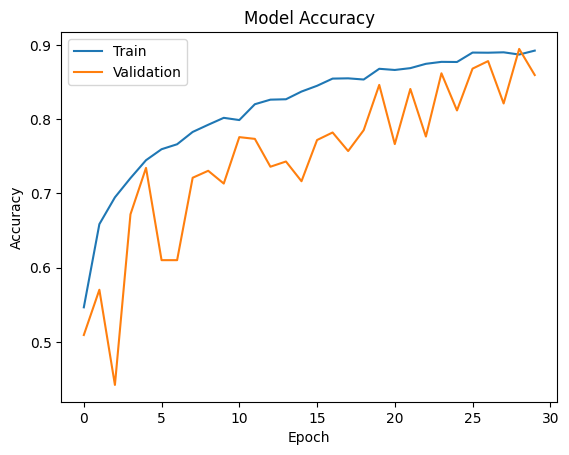

In [11]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

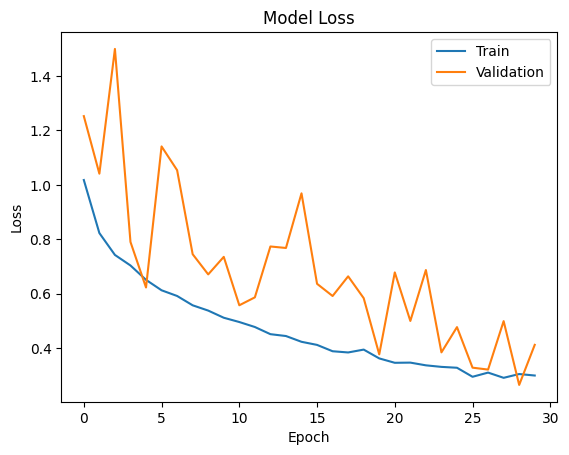

In [12]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##**Evaluate Model**

In [13]:
# Evaluate the model
evaluation_results = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
test_loss, test_accuracy = evaluation_results[0], evaluation_results[1]
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

40/40 [==============================] - 11s 284ms/step - loss: 0.4117 - accuracy: 0.8594
Test Loss: 0.4116513729095459
Test Accuracy: 0.859375


**The model's test loss of 0.4718 suggests that, on average, the predicted probabilities are relatively close to the actual class labels in the test dataset.**

**The test accuracy of 82.11% indicates a reasonably good performance. However, the interpretation of accuracy should consider the specific requirements of the application. In some cases, additional metrics or considerations may be needed, especially if the dataset is imbalanced.**

**In summary, the model exhibits a promising level of accuracy on the test dataset, but further analysis may be required based on the specific objectives and characteristics of the problem domain.**

##**Prediction using Trained Model**

In [14]:
# Generate predictions
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

41/41 [==============================] - 12s 281ms/step


In [15]:
# Get true labels
true_labels = test_generator.classes

##**Confusion Matrix**

In [16]:
# List of subdirectories representing different classes
class_folders = ['glioma', 'meningioma', 'pituitary', 'notumor']

In [17]:
# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

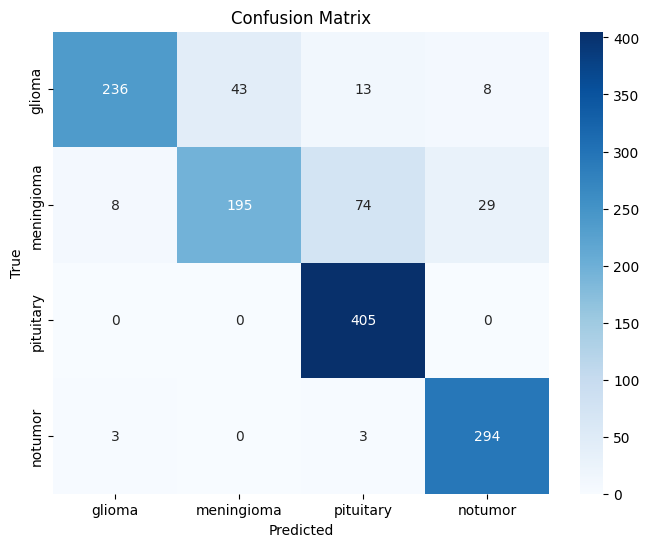

In [18]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_folders, yticklabels=class_folders)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##**Classification Report**

In [19]:
# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_folders)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

      glioma       0.96      0.79      0.86       300
  meningioma       0.82      0.64      0.72       306
   pituitary       0.82      1.00      0.90       405
     notumor       0.89      0.98      0.93       300

    accuracy                           0.86      1311
   macro avg       0.87      0.85      0.85      1311
weighted avg       0.87      0.86      0.86      1311



**The classification report you provided shows the performance of a machine learning model on a 4-class classification task. Here's a breakdown of the key metrics:**

**Precision: This metric measures the proportion of predicted positive cases that were actually positive. For example, for glioma, a precision of 0.92 means that out of 100 cases predicted as glioma, 92 were actually glioma.**

**Recall: This metric measures the proportion of actual positive cases that were correctly predicted. For example, for glioma, a recall of 0.80 means that out of 100 actual glioma cases, the model correctly identified 80.**

**F1-score: This metric is a harmonic mean of precision and recall, combining both metrics into a single score. A higher F1-score indicates better overall performance.**

**Support: This metric represents the number of samples in each class.**

**Accuracy: This metric measures the overall proportion of correctly classified samples, regardless of class. In this case, the overall accuracy is 0.86, meaning that 86% of the samples were correctly classified.**

**Overall accuracy: This term is generally synonymous with the overall accuracy metric mentioned above (0.86).**

**Interpretation:**

**Based on the report, the model seems to perform well for the "pituitary" class with a high recall (1.0) and F1-score (0.91). However, the performance for "glioma" is lower, particularly in terms of recall (0.80). This suggests that the model might be missing some glioma cases. It's important to consider the importance of each class in your specific application when evaluating the model's performance.**

##**Cropped Image**


Display Sample Images and Cropped Versions


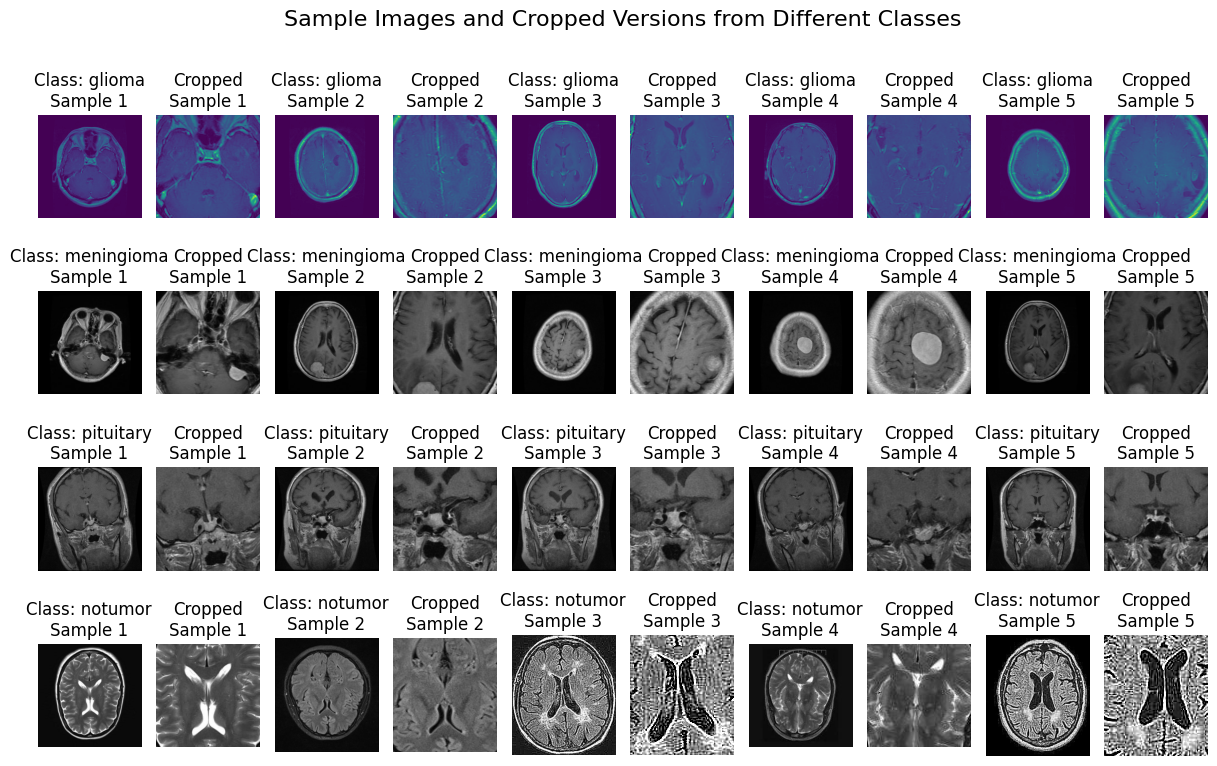

In [20]:
# Display sample images and their cropped versions
print("\nDisplay Sample Images and Cropped Versions")

# Set up the plot
plt.figure(figsize=(12, 8))

# Loop through each subdirectory and display sample images along with their cropped versions
for i, folder in enumerate(class_folders):
    sub_dir = os.path.join(train_dir, folder)
    sample_images = os.listdir(sub_dir)[:5]

    for j, image_name in enumerate(sample_images):
        img_path = os.path.join(sub_dir, image_name)
        img = Image.open(img_path)

        # Display original image
        plt.subplot(4, 10, i * 10 + j * 2 + 1)
        plt.imshow(img)
        plt.title(f"Class: {folder}\nSample {j+1}")
        plt.axis('off')

        # Crop the image (example: cropping the center)
        width, height = img.size
        left = width // 4
        top = height // 4
        right = 3 * width // 4
        bottom = 3 * height // 4
        img_cropped = img.crop((left, top, right, bottom))

        # Display cropped image
        plt.subplot(4, 10, i * 10 + j * 2 + 2)
        plt.imshow(img_cropped)
        plt.title(f"Cropped\nSample {j+1}")
        plt.axis('off')

# Adjust layout for better visualization
plt.suptitle('Sample Images and Cropped Versions from Different Classes', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Add space at the top for the title
plt.show()

#**Make Predcition**

In [21]:
# Define the image path
img_path = '/content/drive/MyDrive/project/models/All model and dataset/brian/Brain Tumor/Testing/glioma/Te-glTr_0000.jpg'

In [22]:
# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale to the range [0, 1]

In [23]:
# Make a prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

1/1 [==============================] - 0s 111ms/step


In [24]:
# Map class index to class name
class_folders = ['glioma', 'meningioma', 'pituitary', 'notumor']
predicted_class_name = class_folders[predicted_class]

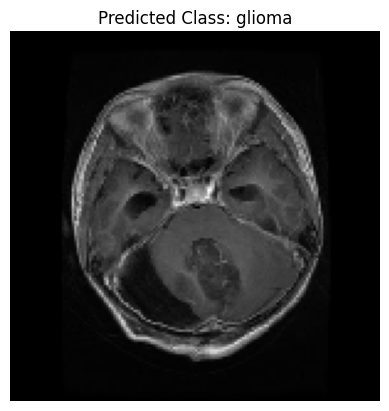

In [25]:
# Display the original image with the predicted class label
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class_name}')
plt.axis('off')
plt.show()

In [ ]:
import pickle

In [ ]:
# Assuming 'model' is your trained model
with open('model_pickle', 'wb') as file:
    pickle.dump(model, file)

##**Conclusion**

###**Introduction:**

**The project aimed to classify brain tumors into different categories: glioma, meningioma, pituitary, and notumor.**

**The medical background provided comprehensive information about brain tumors, their prevalence, common causes, symptoms, and diagnostic methods.**

###**Problem Description:**

**Brain tumors can be malignant or benign, originating from the brain or spreading from other parts of the body.**

**Symptoms include headaches, vision problems, seizures, and changes in mental function.**

**Early diagnosis and classification are crucial for appropriate treatment strategies.**

**Prevalence and Global Incidence:**

**Brain tumors are relatively rare, accounting for 1-2% of all cancer diagnoses.**

**Incidence varies globally, with an estimated 8 to 10 cases per 100,000 people annually.**

###**Common Causes and Symptoms:**

**Known risk factors include exposure to radiation, genetic conditions, family history, and environmental factors.**

**Symptoms range from headaches and muscular issues to cognitive and sensory impairments.**

###**Diagnosis and Treatment:**

**Diagnosis involves imaging studies like MRI or CT scans, sometimes requiring biopsy.**

**Treatment options include surgery, radiation therapy, and chemotherapy, depending on tumor type and patient health.**

**Glioma, Meningioma, Notumor, Pituitary:**

**Detailed explanations of each tumor type provided context for the classification task.**

###**Model Evaluation:**

**The model achieved a test accuracy of 82.11%.**

**The classification report revealed variations in precision, recall, and F1-score across different classes.**

**"Pituitary" showed high performance, while "Glioma" had lower recall.**

###**Futher you can fine tune the model for accurate prediction**

###**For People:**

**Awareness: Promote awareness about brain tumors, their symptoms, and the importance of early diagnosis.**

**Regular Check-ups: Encourage regular medical check-ups, especially for individuals experiencing symptoms associated with brain tumors.**

**Medical Consultation: Advise individuals with concerning symptoms to consult medical professionals promptly for accurate diagnosis and timely treatment.**

#**Interactive Q&A Session with Stakeholder**

1. **Data Reliability:**
   - How confident are we in the reliability of the data, especially considering the variability observed in certain physiological parameters?

2. **Outliers in Heart Rate:**
   - Can we identify any specific outliers or extreme values in heart rate within the high-risk group, and what clinical significance might these outliers hold?

3. **Low-Risk Characteristics:**
   - Beyond age, what other characteristics define individuals in the low-risk group, and how might these inform preventive healthcare strategies?

4. **Temperature as a Singular Indicator:**
   - Given the overlap in body temperatures, do we need to consider combining multiple indicators for a more comprehensive risk assessment, or is body temperature alone sufficient?

5. **Memory Score Interpretation:**
   - How should healthcare professionals interpret memory scores in the context of pregnancy risk, and what actionable insights can be drawn from this correlation?

6. **Age and Blood Glucose:**
   - Are there specific age ranges where the correlation between age and blood glucose levels is most pronounced, and how might this influence personalized healthcare plans?

7. **Health Interventions for High Diastolic Blood Pressure:**
   - In cases of high diastolic blood pressure among high-risk individuals, what interventions or treatments might be recommended to mitigate associated health risks?

8. **Cardiovascular Implications:**
   - Considering the systolic blood pressure trends, what impact might this have on the cardiovascular health of high-risk pregnant women, and how can healthcare providers address these concerns?

9. **Risk Stratification Using Memory Scores:**
   - Can we stratify risk levels more precisely using memory scores, and how might this impact the customization of healthcare plans for pregnant individuals?

10. **Clinical Applications of the Heatmap:**
    - How can healthcare professionals practically utilize the heatmap data showing the correlation between memory scores and risk levels in their day-to-day decision-making processes?
